In [2]:
import pandas as pd
import numpy as np
import sklearn
import pickle 
import time 
import datetime
import warnings
import matplotlib.pyplot as plt
import torch
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import graft
import torch_geometric


In [3]:
with open('./fraudTrain.pkl', 'rb') as file:
    fraudTrain = pickle.load(file)    

In [4]:
s = fraudTrain.cc_num.value_counts().sort_values().reset_index()
cc = s.iloc[56:100,0]

In [5]:
cc_num = fraudTrain[fraudTrain.cc_num.isin(cc)]

In [6]:
cc_num_count = cc_num.groupby('cc_num')['is_fraud'].agg(['count','sum'])

# cc_num

In [7]:
cc_num_count

count  sum
cc_num                  
6.048700e+10    379    0
5.702730e+11    395    0
6.762340e+11    400   10
6.763270e+11    398    8
4.807550e+12    403    4
3.040830e+13    402    0
3.057020e+13    404    0
3.619260e+13    403   12
3.689030e+13    399    0
3.885950e+13    398    0
1.800590e+14    361    9
2.131370e+14    389   10
2.131990e+14    404    0
3.420360e+14    399   11
3.462440e+14    403   10
3.748220e+14    390    0
3.791410e+14    398    0
2.268220e+15    390    0
2.318060e+15    398    0
2.714020e+15    365    0
3.501370e+15    401    0
3.530500e+15    394    0
3.534090e+15    395   15
3.551510e+15    383    4
3.565940e+15    391   12
3.582400e+15    398    0
3.592330e+15    398    0
4.171400e+15    401    0
4.308160e+15    402    9
4.335530e+15    402    0
4.610060e+15    370    0
4.878360e+15    386    4
4.914700e+15    401    0
5.289290e+15    405    0
5.410060e+15    383    0
6.535330e+15    400    0
6.592070e+15    402    6
4.226220e+18    399    3
4.244950e+18    403    0
4.373370e+18    401    8
4.426080e+18    404   11
4.462040e+18    383    0
4.725840e+18    401    0
4.798940e+18    403    7

In [8]:
def compute_time_difference(group):
    n = len(group)
    result = []
    for i in range(n):
        for j in range(n):
            time_difference = abs(group.iloc[i].trans_date_trans_time.value - group.iloc[j].trans_date_trans_time.value)
            result.append([group.iloc[i].name, group.iloc[j].name, time_difference])
    return result


In [213]:
def plot_cc_graph(cc_tt, cc_num):
    groups = cc_tt[cc_tt['cc_num'] == cc_num]
    
    edge_index = compute_time_difference(groups)
    edge_index = (np.array(edge_index)).astype(np.float64)
    edge_index = np.array(edge_index)[np.array(edge_index)[:,0] != np.array(edge_index)[:,1]]
    theta = edge_index[:,2].mean()
    #theta = 1e7
    edge_index[:,2] = (np.exp(-edge_index[:,2]/theta)!= 1)*(np.exp(-edge_index[:,2]/theta))
    edge_index = edge_index.tolist()
    
    selected_indices1 = cc_tt[cc_tt['cc_num'] ==  cc_num].index
    is_fraud_values1 = cc_tt.loc[selected_indices1, 'is_fraud'].tolist()
    g = torch_geometric.data.Data(
        edge_index = np.array(edge_index)[:,:2],
        edge_attr = np.array(edge_index)[:,-1],  # weight
        x = cc_tt.loc[selected_indices1, 'amt'].tolist(),
        y = cc_tt.loc[selected_indices1, 'is_fraud'].tolist()
    )
    
    
    
    unique_nodes = set(g.edge_index.reshape(-1).tolist())
    dict_map = {n:i for i,n in enumerate(unique_nodes)}
    source, target = np.array(edge_index)[:,0], np.array(edge_index)[:,1]
    edge_index_selected2 = torch.tensor([[dict_map[s] for s in source.tolist()],[dict_map[t] for t in target.tolist()]])
    
    g = torch_geometric.data.Data(
        edge_index = edge_index_selected2,
        edge_attr = np.array(edge_index)[:,-1],
        x = cc_tt.loc[selected_indices1, 'amt'].tolist(),
        y = cc_tt.loc[selected_indices1, 'is_fraud'].tolist()
    )
    
    dr_opts = { 
        'output_size': (500,500),
        'edge_marker_size': 1,
      #'output':"ten-nodes.pdf",
    }
    graft.graph.plot_undirected_weighted(
        g,
        node_color=g.y,
        node_size=g.x,
        edge_weight_text=False,
        edge_weight_width_scale=3.0,
        draw_options= dr_opts,
    )
    


# 6.762340e+11	

In [106]:
cc_num =  6.762340e+11
s = fraudTrain[fraudTrain['cc_num'] == 6.762340e+11]

In [107]:
s.is_fraud.mean(), s.is_fraud.sum(), len(s)

(0.025, 10, 400)

In [108]:
s[s.is_fraud == 1][['trans_date_trans_time','amt']]

trans_date_trans_time      amt
43548   2019-01-27 01:34:00   329.83
43755   2019-01-27 04:43:00   298.01
45318   2019-01-27 22:35:00  1043.38
45352   2019-01-27 22:53:00  1189.69
45384   2019-01-27 23:11:00   289.80
45388   2019-01-27 23:12:00   795.01
45476   2019-01-28 00:07:00   296.87
45605   2019-01-28 01:51:00   294.02
45738   2019-01-28 03:29:00   321.49
47720   2019-01-28 22:54:00   287.42

In [109]:
cc_tt = s[('2019-01-28' < s['trans_date_trans_time']) & (s['trans_date_trans_time'] < '2019-02-08')]
len(cc_tt), cc_tt.is_fraud.mean()

(10, 0.4)

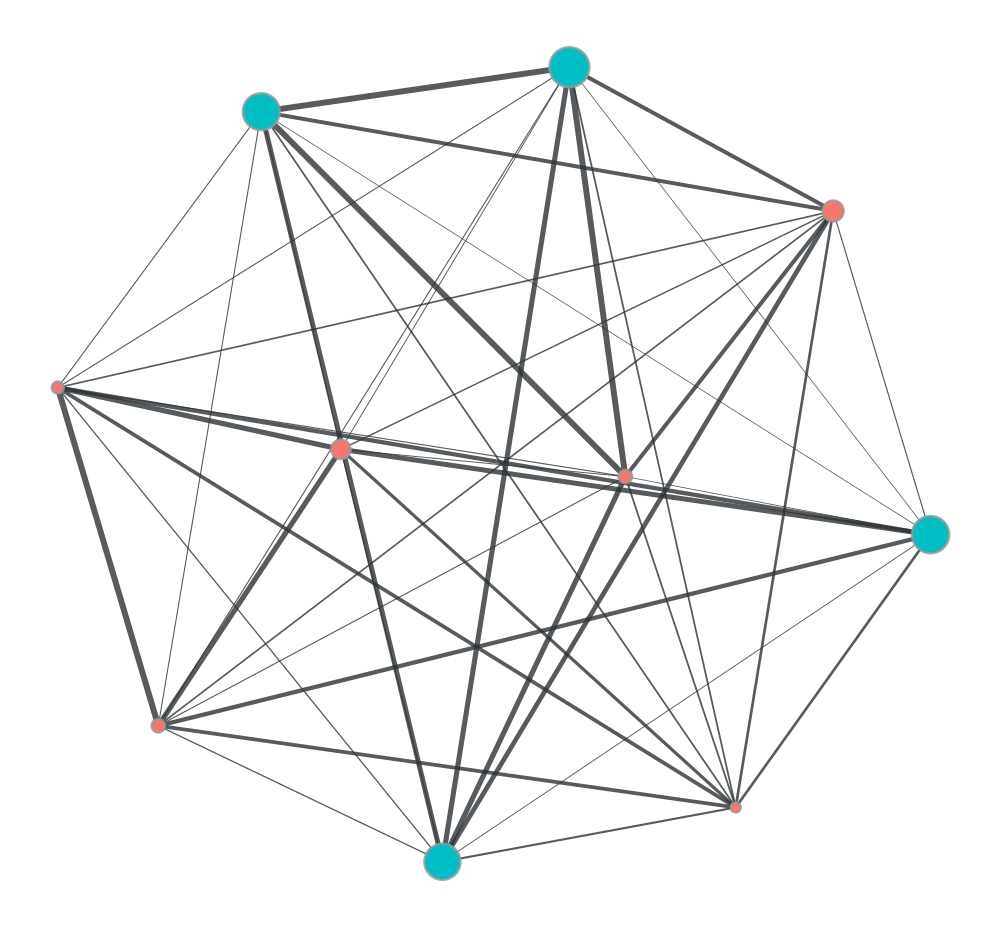

In [110]:
plot_cc_graph(cc_tt,cc_num)

# 6.763270e+11

In [111]:
cc_num =  6.763270e+11
s = fraudTrain[fraudTrain['cc_num'] == cc_num]

In [112]:
s.is_fraud.mean(), s.is_fraud.sum(), len(s)

(0.020100502512562814, 8, 398)

In [113]:
s[s.is_fraud == 1][['trans_date_trans_time','amt']]

trans_date_trans_time      amt
683413   2019-10-19 00:30:00   294.00
683471   2019-10-19 01:03:00     9.98
685812   2019-10-19 22:26:00   995.57
686002   2019-10-19 23:45:00  1091.61
688955   2019-10-20 22:10:00  1000.46
689055   2019-10-20 22:47:00   911.61
689062   2019-10-20 22:48:00  1018.86
689191   2019-10-20 23:37:00   875.86

In [118]:
cc_tt = s[('2019-10-13' <= s['trans_date_trans_time']) & (s['trans_date_trans_time'] <= '2019-10-19 02:00:00')]
len(cc_tt), cc_tt.is_fraud.mean()

(9, 0.2222222222222222)

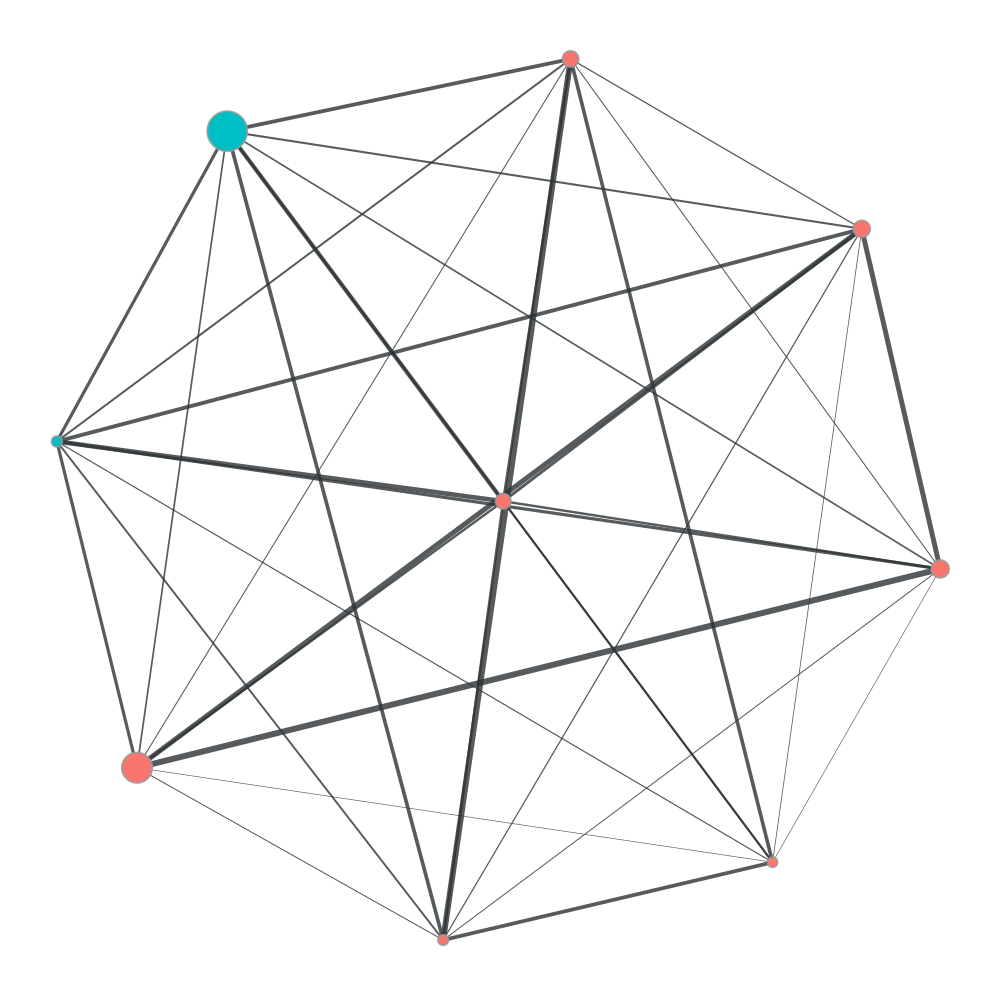

In [119]:
plot_cc_graph(cc_tt,cc_num)

---

# 4.807550e+12

In [120]:
cc_num = 4.807550e+12
s = fraudTrain[fraudTrain['cc_num'] == cc_num]

In [121]:
s.is_fraud.mean(), s.is_fraud.sum(), len(s)

(0.009925558312655087, 4, 403)

In [122]:
s[s.is_fraud == 1][['trans_date_trans_time','amt']]

trans_date_trans_time     amt
950365   2020-01-16 03:15:00  357.62
952947   2020-01-17 22:15:00  322.87
952998   2020-01-17 23:02:00  918.50
953018   2020-01-17 23:16:00  307.02

In [123]:
cc_tt = s[('2020-01-14' <= s['trans_date_trans_time']) & (s['trans_date_trans_time'] <= '2020-01-25')]
len(cc_tt), cc_tt.is_fraud.mean()

(10, 0.4)

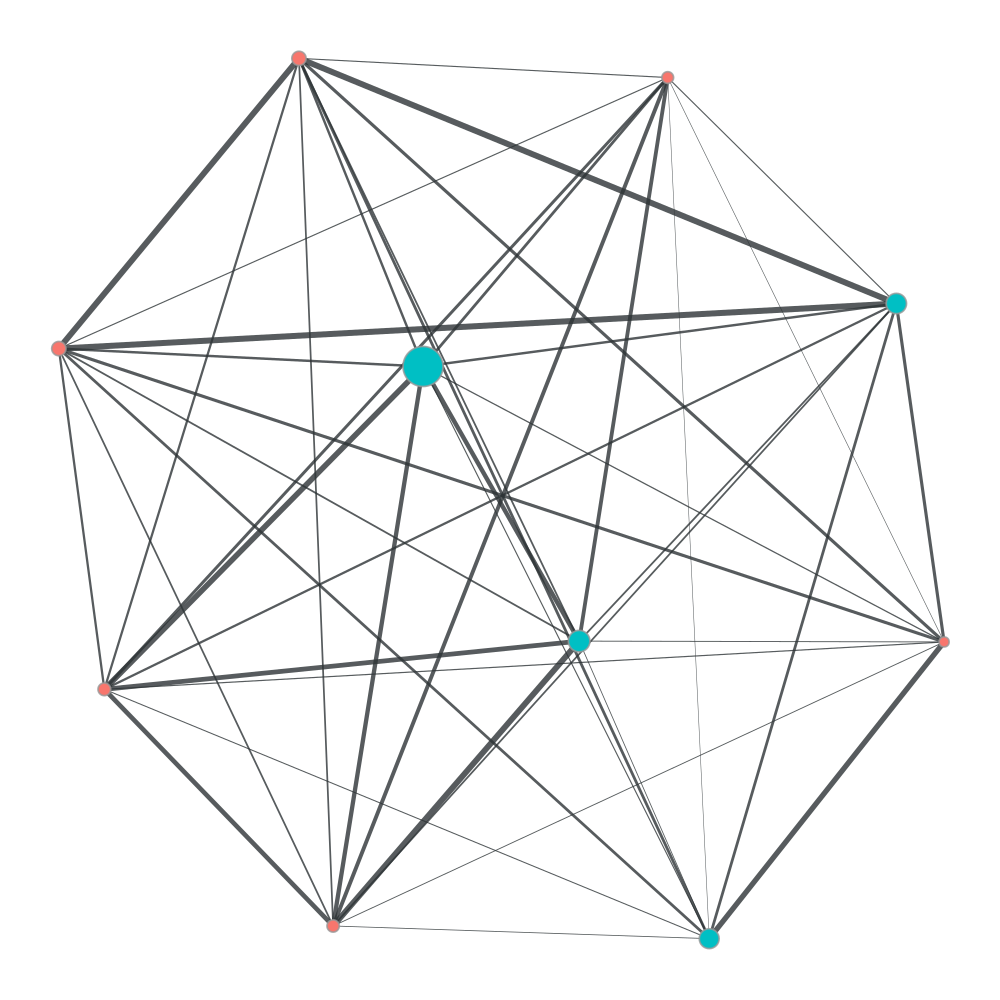

In [124]:
plot_cc_graph(cc_tt,cc_num)

---

# 3.619260e+13

In [125]:
cc_num = 3.619260e+13
s = fraudTrain[fraudTrain['cc_num'] == cc_num]

In [126]:
s.is_fraud.mean(), s.is_fraud.sum(), len(s)

(0.02977667493796526, 12, 403)

In [127]:
s[s.is_fraud == 1][['trans_date_trans_time','amt']]

trans_date_trans_time      amt
262530   2019-05-11 00:49:00     8.52
262532   2019-05-11 00:50:00     6.30
262542   2019-05-11 00:57:00   830.38
262687   2019-05-11 02:24:00   338.29
264993   2019-05-11 22:40:00    22.32
265252   2019-05-12 00:49:00  1016.88
265303   2019-05-12 01:17:00   494.73
265325   2019-05-12 01:30:00  1152.92
265353   2019-05-12 01:49:00   580.32
267243   2019-05-12 17:09:00    17.38
268167   2019-05-12 22:46:00   242.48
268299   2019-05-12 23:31:00     8.74

In [128]:
cc_tt = s[('2019-05-9' <= s['trans_date_trans_time']) & (s['trans_date_trans_time'] <= '2019-05-12')]
len(cc_tt), cc_tt.is_fraud.mean()

(6, 0.8333333333333334)

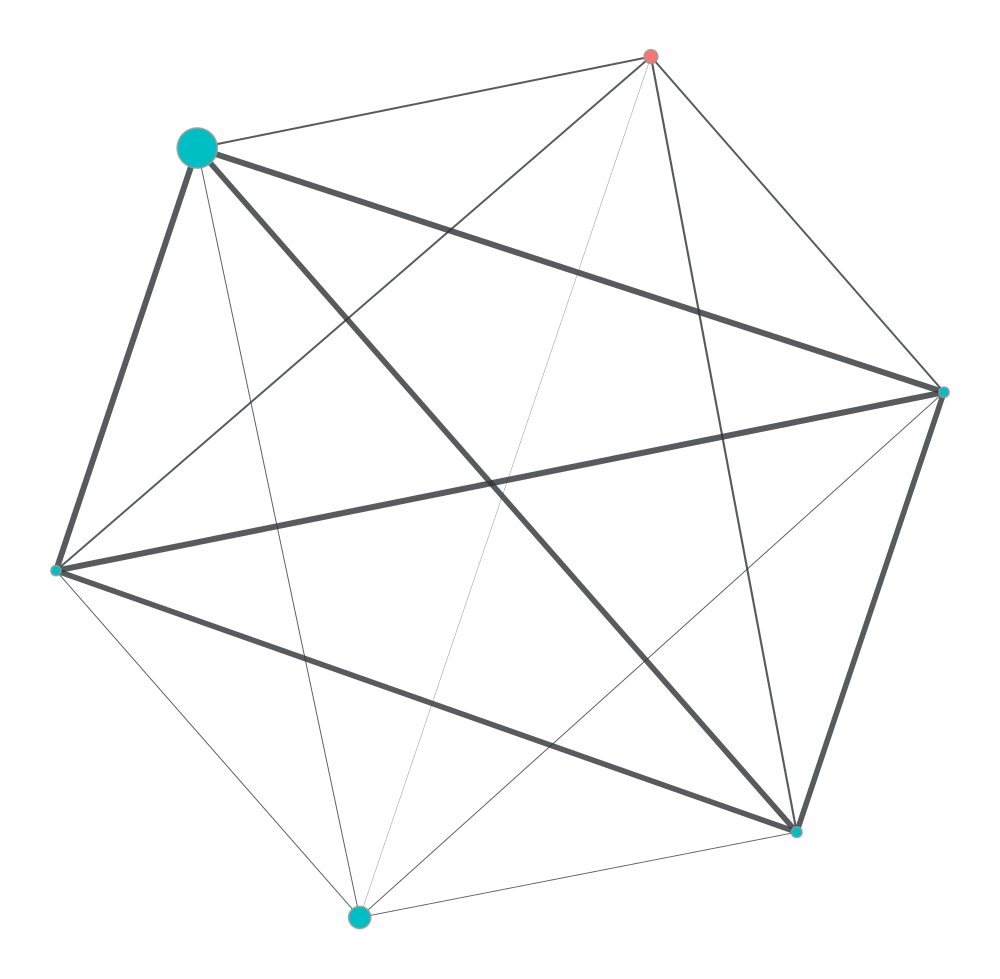

In [129]:
plot_cc_graph(cc_tt,cc_num)

---

# 1.800590e+14

In [132]:
cc_num = 1.800590e+14
s = fraudTrain[fraudTrain['cc_num'] == cc_num]

In [133]:
s.is_fraud.mean(), s.is_fraud.sum(), len(s)

(0.024930747922437674, 9, 361)

In [134]:
cc_tt = s[('2019-06-03' <= s['trans_date_trans_time']) & (s['trans_date_trans_time'] <= '2019-06-10')]
len(cc_tt), cc_tt.is_fraud.mean()

(11, 0.5454545454545454)

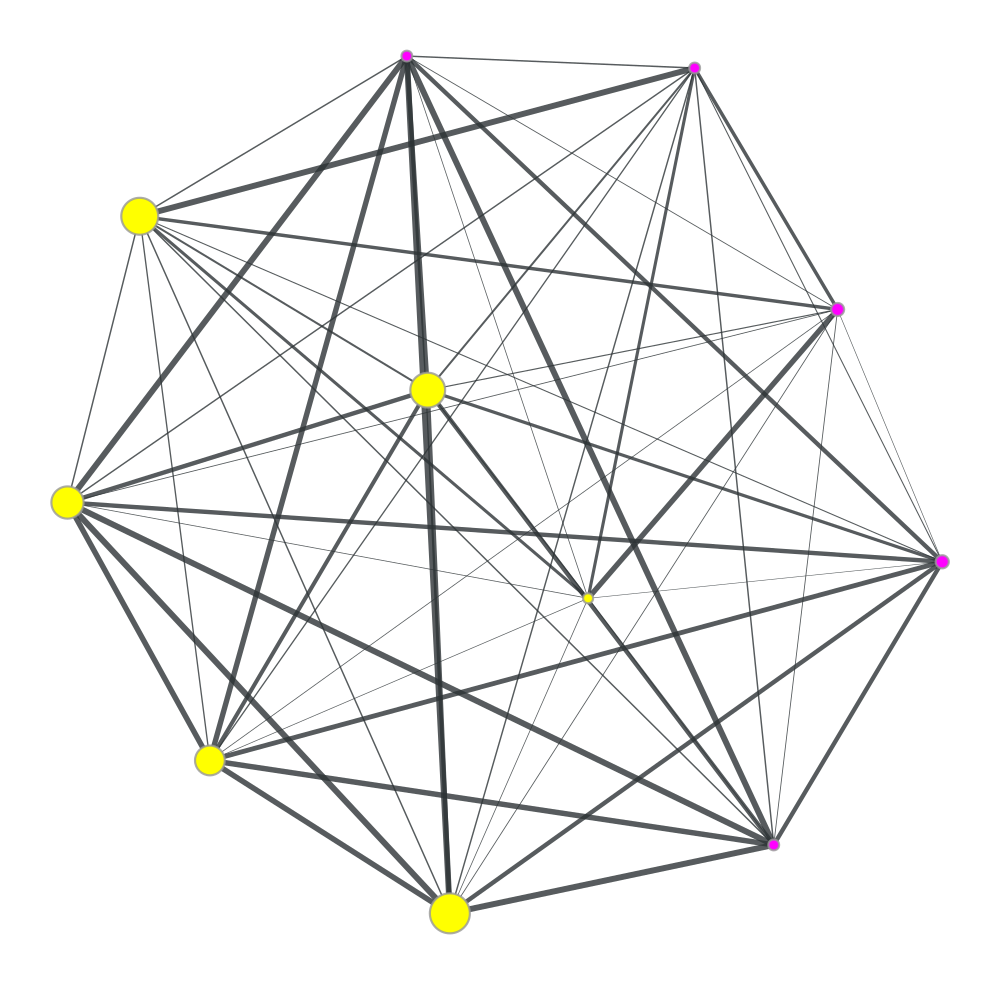

In [135]:
plot_cc_graph(cc_tt,cc_num)

---

# 2.131370e+14

In [137]:
cc_num = 2.131370e+14
s = fraudTrain[fraudTrain['cc_num'] == cc_num]

In [138]:
s.is_fraud.mean(), s.is_fraud.sum(), len(s)

(0.02570694087403599, 10, 389)

In [139]:
s[s.is_fraud == 1][['trans_date_trans_time','amt']]

trans_date_trans_time      amt
603668   2019-09-13 23:22:00   933.01
603725   2019-09-13 23:52:00   283.29
603844   2019-09-14 01:21:00   328.16
603975   2019-09-14 02:47:00    16.33
604036   2019-09-14 03:28:00   330.03
604897   2019-09-14 12:54:00   874.52
605280   2019-09-14 15:39:00   954.72
605564   2019-09-14 17:54:00   331.13
606216   2019-09-14 22:21:00    49.55
606309   2019-09-14 23:02:00  1058.49

In [140]:
cc_tt = s[('2019-09-14 22:00:00' <= s['trans_date_trans_time']) & (s['trans_date_trans_time'] <= '2019-09-30')]
len(cc_tt), cc_tt.is_fraud.mean()

(10, 0.2)

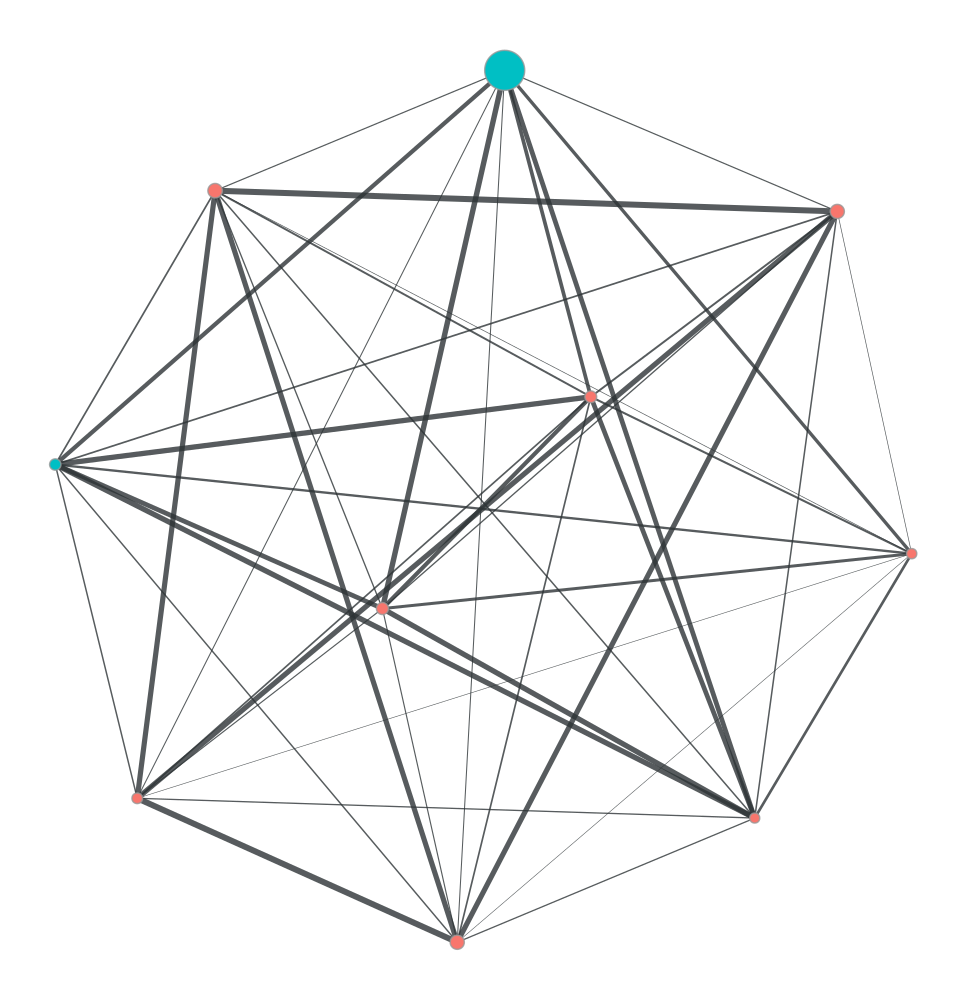

In [141]:
plot_cc_graph(cc_tt,cc_num)

---

# 3.420360e+14

In [142]:
cc_num = 3.420360e+14
s = fraudTrain[fraudTrain['cc_num'] == cc_num]

In [143]:
s.is_fraud.mean(), s.is_fraud.sum(), len(s)

(0.02756892230576441, 11, 399)

In [144]:
s[s.is_fraud == 1][['trans_date_trans_time','amt']]

trans_date_trans_time      amt
12204   2019-01-08 01:23:00    15.82
12225   2019-01-08 01:36:00   334.28
12297   2019-01-08 02:33:00   327.26
12420   2019-01-08 04:02:00     8.33
14225   2019-01-08 22:27:00   848.32
14405   2019-01-08 23:54:00  1030.43
15451   2019-01-09 22:00:00  1104.38
15454   2019-01-09 22:02:00   937.57
15471   2019-01-09 22:23:00   918.69
15472   2019-01-09 22:23:00    10.53
15517   2019-01-09 23:04:00  1148.15

In [145]:
cc_tt = s[('2019-01-09 22:00:00' <= s['trans_date_trans_time']) & (s['trans_date_trans_time'] <= '2019-01-20')]
len(cc_tt), cc_tt.is_fraud.mean()

(13, 0.38461538461538464)

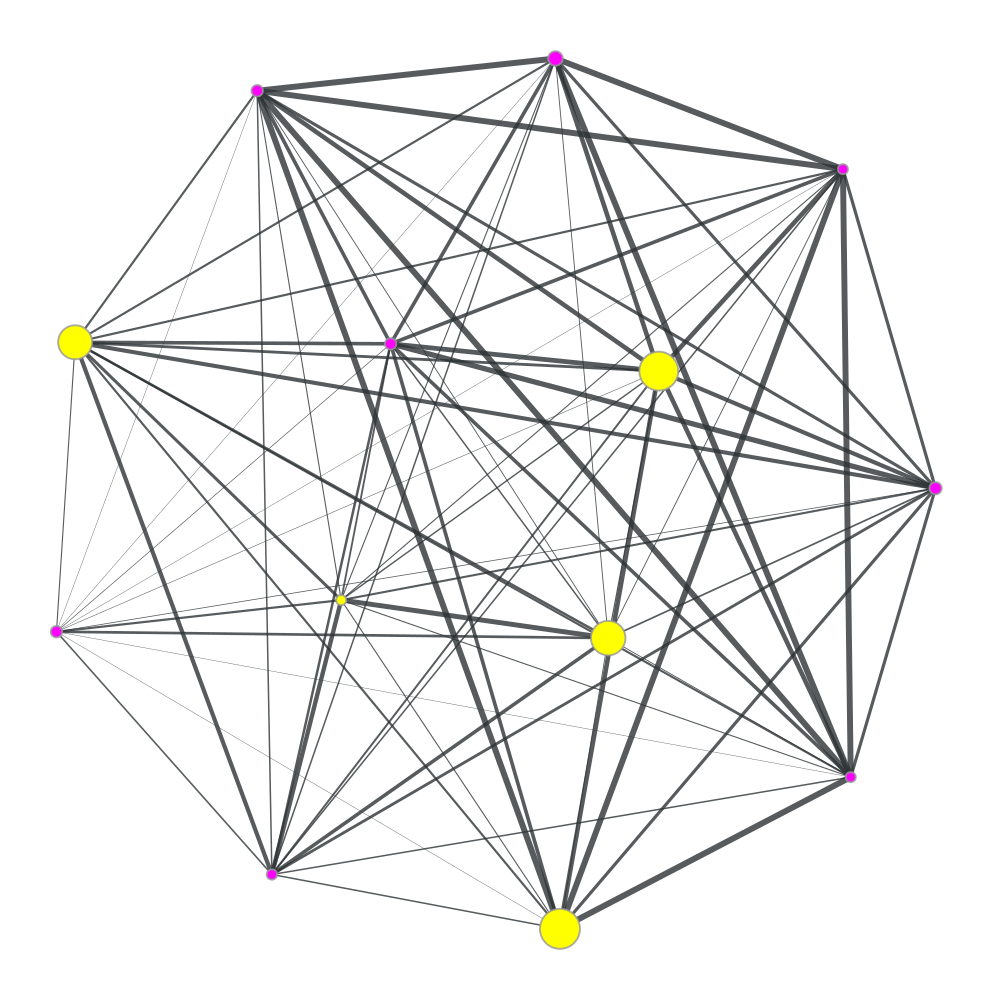

In [146]:
plot_cc_graph(cc_tt, cc_num)

---

# 3.534090e+15

In [147]:
cc_num = 3.534090e+15
s = fraudTrain[fraudTrain['cc_num'] == cc_num]

In [148]:
s.is_fraud.mean(), s.is_fraud.sum(), len(s)

(0.0379746835443038, 15, 395)

In [149]:
s[s.is_fraud == 1][['trans_date_trans_time','amt']]

trans_date_trans_time      amt
622765   2019-09-22 03:07:00   352.84
624114   2019-09-22 14:34:00    48.03
625382   2019-09-22 22:18:00     2.61
625388   2019-09-22 22:21:00     6.94
625415   2019-09-22 22:30:00  1191.57
625504   2019-09-22 23:06:00   989.39
625633   2019-09-22 23:47:00     2.77
625951   2019-09-23 02:49:00   321.05
627489   2019-09-23 15:41:00   973.37
628599   2019-09-23 22:39:00    51.70
628631   2019-09-23 22:52:00  1051.53
628718   2019-09-23 23:21:00   777.55
628734   2019-09-23 23:26:00   980.38
628751   2019-09-23 23:33:00  1053.56
628763   2019-09-23 23:36:00   297.08

In [154]:
cc_tt = s[('2019-09-15' <= s['trans_date_trans_time']) & (s['trans_date_trans_time'] <= '2019-09-23')]
len(cc_tt), cc_tt.is_fraud.mean()

(13, 0.5384615384615384)

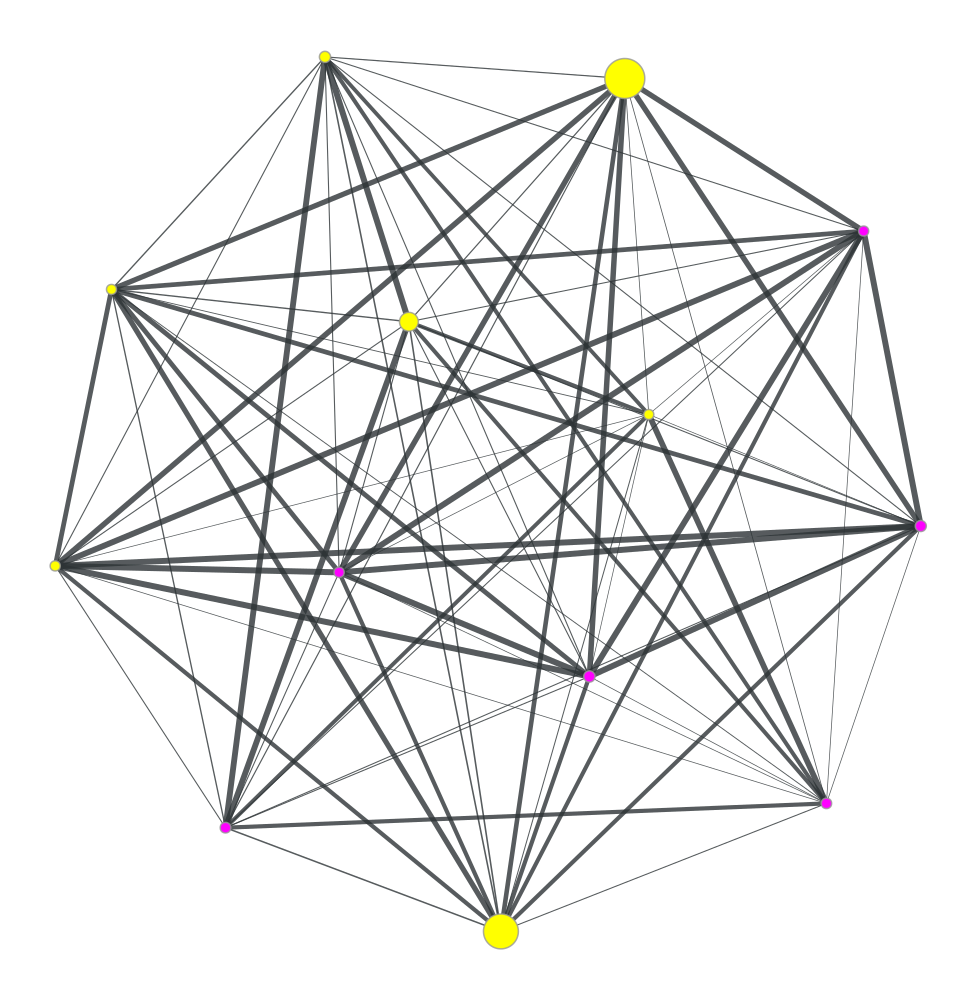

In [155]:
plot_cc_graph(cc_tt, cc_num)

---

# 3.551510e+15

In [156]:
cc_num = 3.551510e+15
s = fraudTrain[fraudTrain['cc_num'] == cc_num]

In [157]:
s.is_fraud.mean(), s.is_fraud.sum(), len(s)

(0.010443864229765013, 4, 383)

In [158]:
s[s.is_fraud == 1][['trans_date_trans_time','amt']]

trans_date_trans_time      amt
981628   2020-02-03 01:24:00    13.28
983692   2020-02-03 22:57:00  1008.29
983839   2020-02-04 00:51:00   331.73
983916   2020-02-04 03:02:00   306.63

In [164]:
cc_tt = s[('2020-01-28' <= s['trans_date_trans_time']) & (s['trans_date_trans_time'] <= '2020-02-05')]
len(cc_tt), cc_tt.is_fraud.mean()

(10, 0.4)

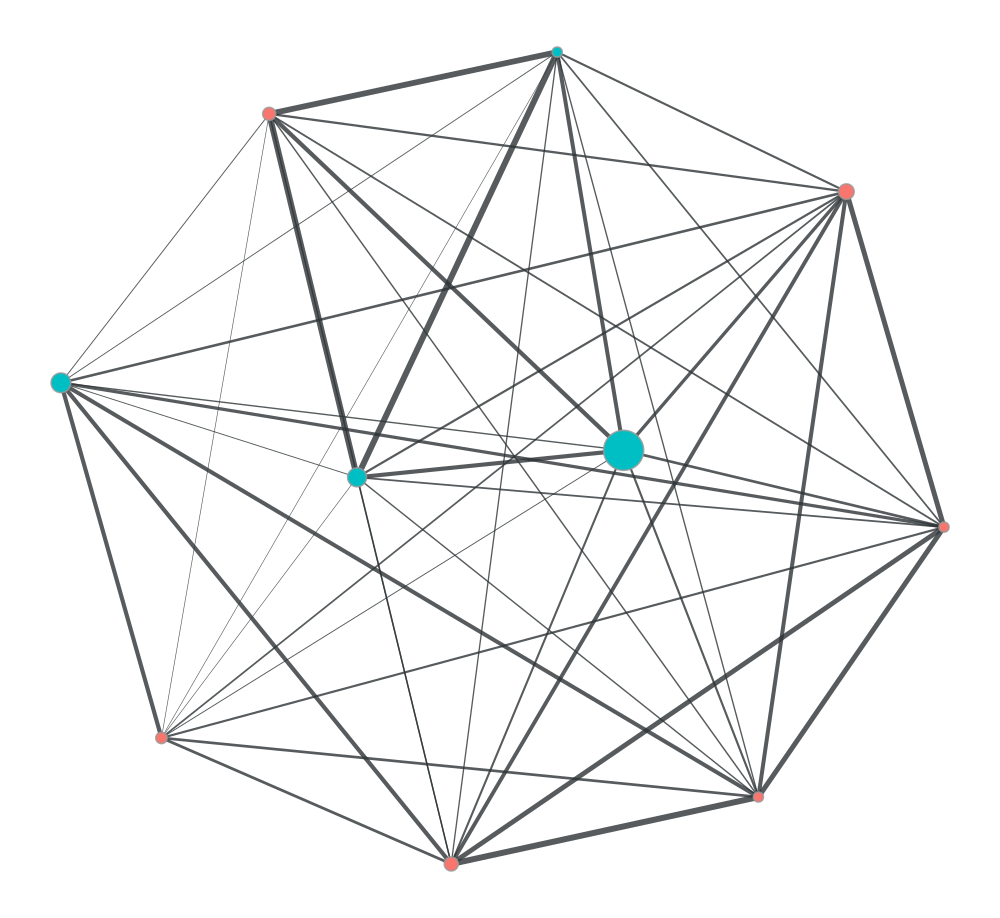

In [165]:
plot_cc_graph(cc_tt, cc_num)

---

# 3.565940e+15	

In [166]:
cc_num = 3.565940e+15	
s = fraudTrain[fraudTrain['cc_num'] == cc_num]

In [167]:
s.is_fraud.mean(), s.is_fraud.sum(), len(s)

(0.030690537084398978, 12, 391)

In [168]:
s[s.is_fraud == 1][['trans_date_trans_time','amt']]

trans_date_trans_time      amt
619788   2019-09-21 00:26:00   281.53
619860   2019-09-21 01:18:00     7.54
620051   2019-09-21 03:37:00   283.76
621562   2019-09-21 17:41:00   905.66
622366   2019-09-21 23:34:00   993.47
622406   2019-09-21 23:51:00  1026.61
622471   2019-09-22 00:24:00     7.79
622506   2019-09-22 00:45:00   298.23
622562   2019-09-22 01:14:00    12.25
622721   2019-09-22 02:43:00    10.59
624438   2019-09-22 16:32:00   915.77
625631   2019-09-22 23:45:00   668.94

In [173]:
cc_tt = s[('2019-09-22' <= s['trans_date_trans_time']) & (s['trans_date_trans_time'] <= '2019-10-07')]
len(cc_tt), cc_tt.is_fraud.mean()

(15, 0.4)

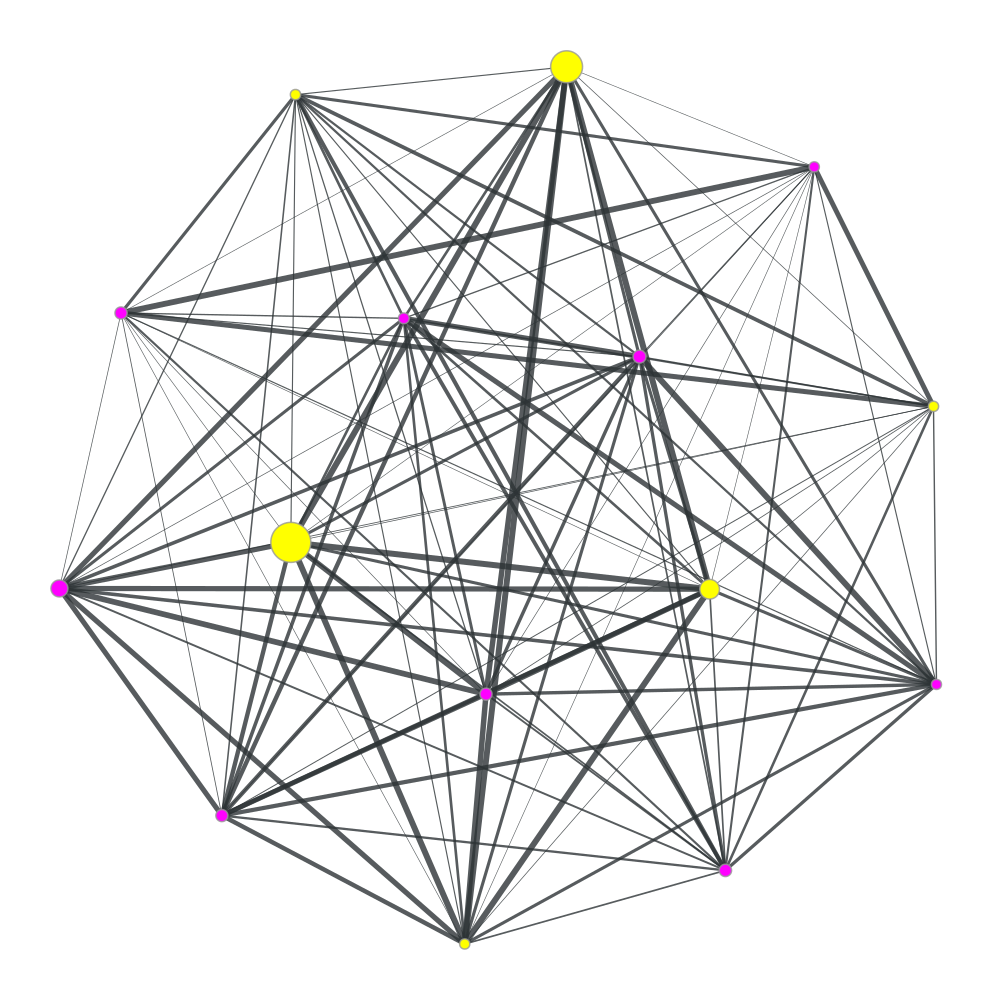

In [174]:
plot_cc_graph(cc_tt, cc_num)

---

# 4.308160e+15

In [175]:
cc_num = 4.308160e+15
s = fraudTrain[fraudTrain['cc_num'] == cc_num]

In [176]:
s.is_fraud.mean(), s.is_fraud.sum(), len(s)

(0.022388059701492536, 9, 402)

In [177]:
s[s.is_fraud == 1][['trans_date_trans_time','amt']]

trans_date_trans_time      amt
392220   2019-06-28 20:27:00   935.03
392308   2019-06-28 21:19:00   261.49
392822   2019-06-29 01:32:00    10.06
392872   2019-06-29 01:58:00   310.54
393001   2019-06-29 03:05:00   331.27
395794   2019-06-29 22:51:00   765.07
395924   2019-06-29 23:37:00  1153.57
395954   2019-06-29 23:45:00   769.48
395979   2019-06-29 23:52:00   865.48

In [182]:
cc_tt = s[('2019-06-21' <= s['trans_date_trans_time']) & (s['trans_date_trans_time'] <= '2019-06-29 01:35:00')]
len(cc_tt), cc_tt.is_fraud.mean()

(9, 0.3333333333333333)

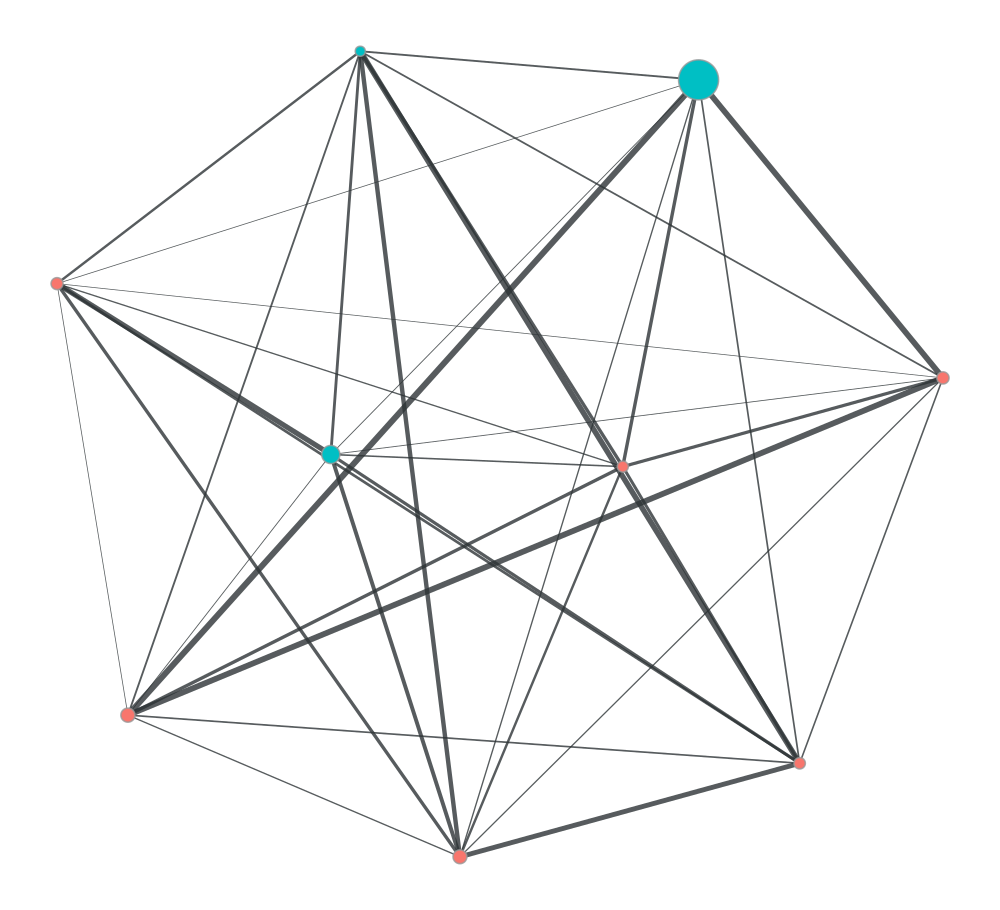

In [183]:
plot_cc_graph(cc_tt, cc_num)

---

# 4.878360e+15

In [184]:
cc_num = 4.878360e+15
s = fraudTrain[fraudTrain['cc_num'] == cc_num]

In [185]:
s.is_fraud.mean(), s.is_fraud.sum(), len(s)

(0.010362694300518135, 4, 386)

In [186]:
s[s.is_fraud == 1][['trans_date_trans_time','amt']]

trans_date_trans_time     amt
26575   2019-01-16 01:52:00  330.32
27254   2019-01-16 16:11:00  311.01
27584   2019-01-16 22:27:00  793.22
28901   2019-01-17 23:42:00  347.53

In [187]:
cc_tt = s[('2019-01-16' <= s['trans_date_trans_time']) & (s['trans_date_trans_time'] <= '2019-01-31')]
len(cc_tt), cc_tt.is_fraud.mean()

(12, 0.3333333333333333)

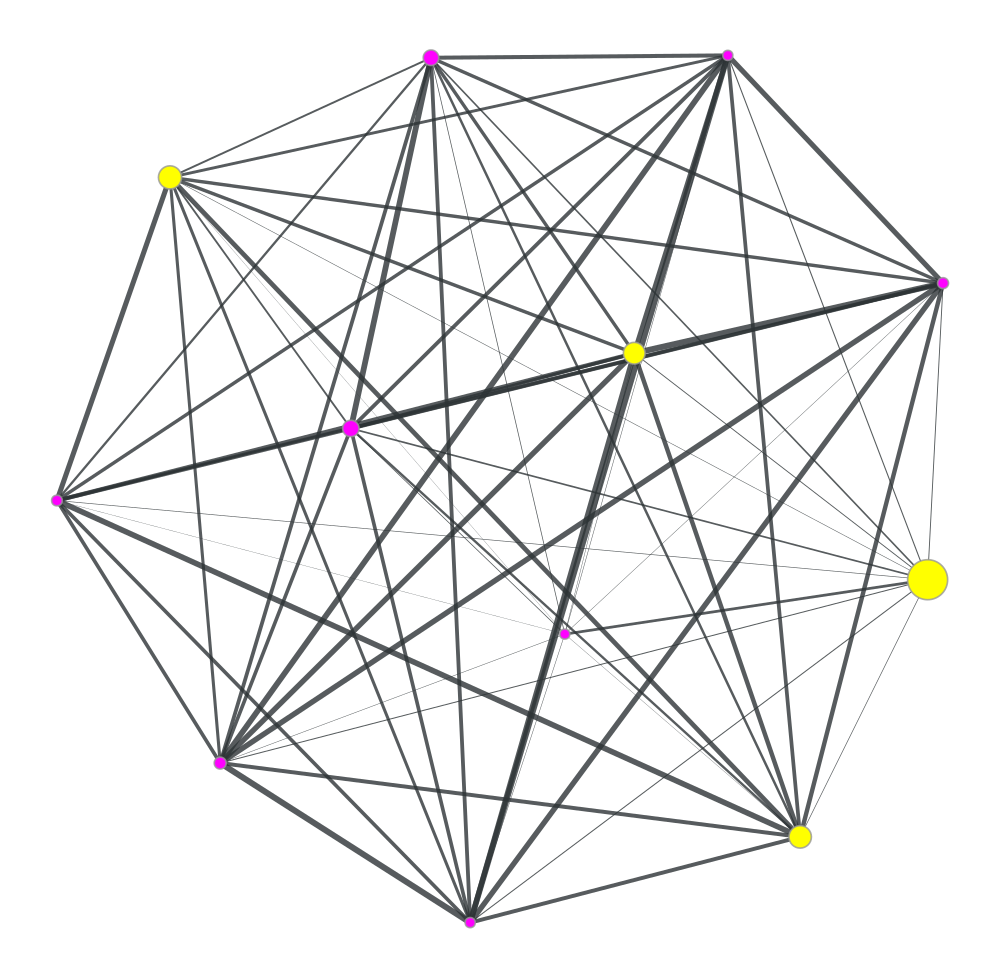

In [188]:
plot_cc_graph(cc_tt, cc_num)

---

# 6.592070e+15

In [189]:
cc_num = 6.592070e+15
s = fraudTrain[fraudTrain['cc_num'] == cc_num]

In [190]:
s.is_fraud.mean(), s.is_fraud.sum(), len(s)

(0.014925373134328358, 6, 402)

In [191]:
s[s.is_fraud == 1][['trans_date_trans_time','amt']]

trans_date_trans_time     amt
100646   2019-02-28 01:57:00  744.23
102066   2019-02-28 21:00:00  247.83
102233   2019-02-28 22:30:00   24.37
102771   2019-03-01 05:58:00  101.79
103533   2019-03-01 16:22:00   20.17
104055   2019-03-01 22:13:00  243.17

In [196]:
cc_tt = s[('2019-02-20' <= s['trans_date_trans_time']) & (s['trans_date_trans_time'] <= '2019-03-01')]
len(cc_tt), cc_tt.is_fraud.mean()

(8, 0.375)

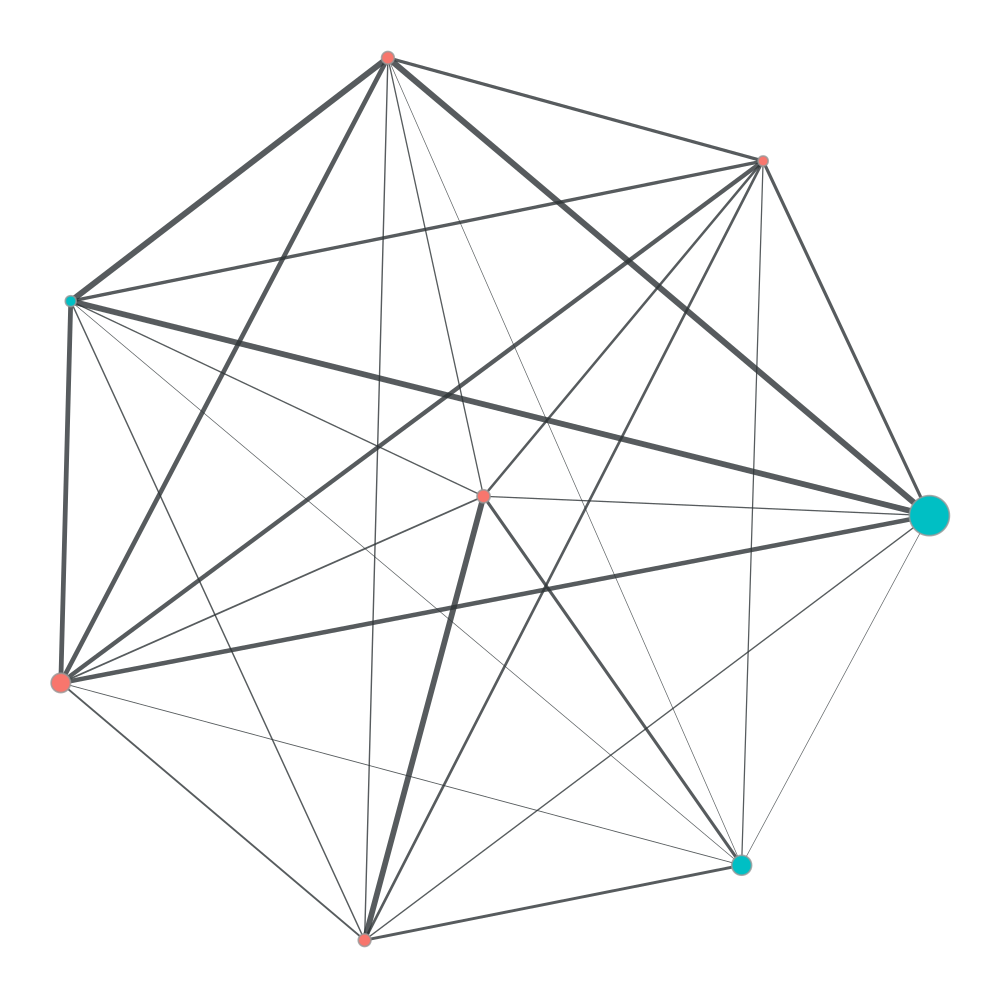

In [197]:
plot_cc_graph(cc_tt, cc_num)

---

# 4.226220e+18	

In [198]:
cc_num = 4.226220e+18
s = fraudTrain[fraudTrain['cc_num'] == cc_num]

In [199]:
s.is_fraud.mean(), s.is_fraud.sum(), len(s)

(0.007518796992481203, 3, 399)

In [200]:
s[s.is_fraud == 1][['trans_date_trans_time','amt']]

trans_date_trans_time     amt
657952   2019-10-07 04:40:00  331.98
659382   2019-10-07 16:20:00   19.17
660568   2019-10-07 23:48:00   18.11

In [202]:
cc_tt = s[('2019-10-07' <= s['trans_date_trans_time']) & (s['trans_date_trans_time'] <= '2019-10-15')]
len(cc_tt), cc_tt.is_fraud.mean()

(10, 0.3)

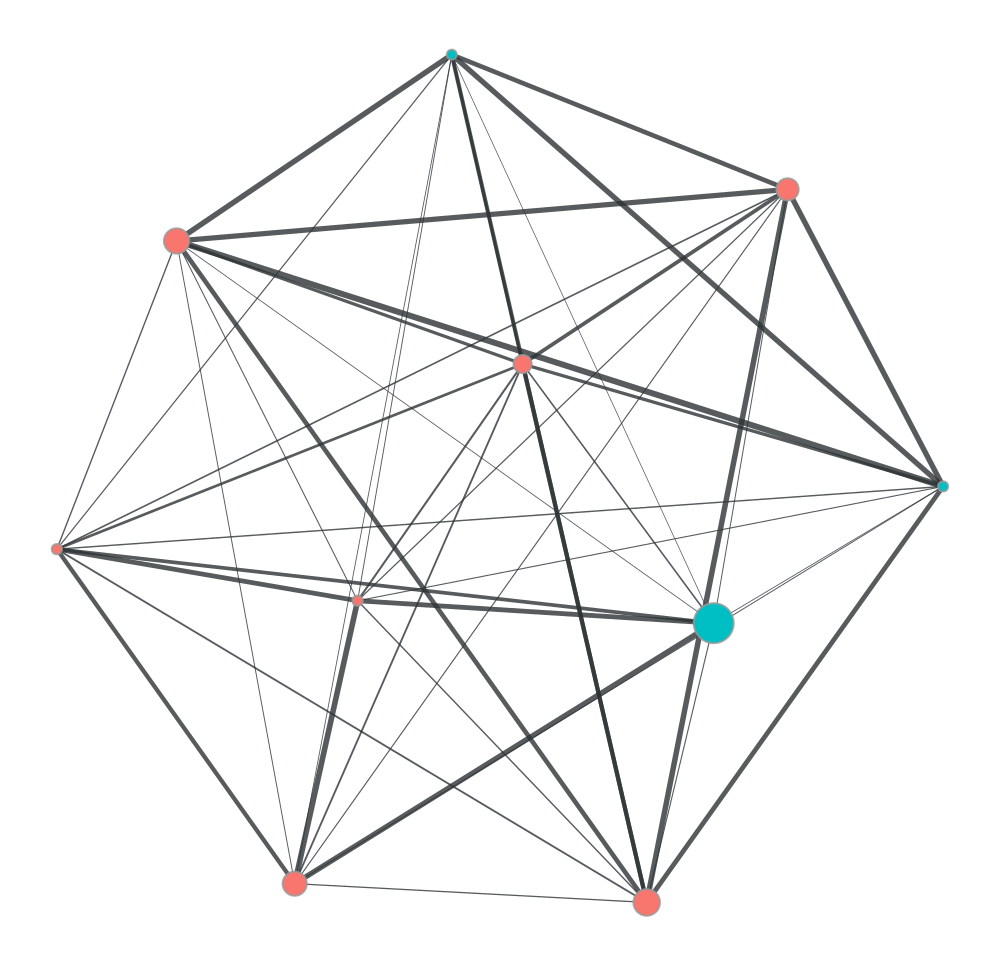

In [203]:
plot_cc_graph(cc_tt, cc_num)

---

# 4.373370e+18

In [205]:
cc_num = 4.373370e+18
s = fraudTrain[fraudTrain['cc_num'] == cc_num]

In [206]:
s.is_fraud.mean(), s.is_fraud.sum(), len(s)

(0.0199501246882793, 8, 401)

In [207]:
s[s.is_fraud == 1][['trans_date_trans_time','amt']]

trans_date_trans_time      amt
144731   2019-03-19 00:23:00  1059.12
144759   2019-03-19 01:05:00   354.00
144821   2019-03-19 02:16:00   837.95
144915   2019-03-19 03:55:00  1017.04
146236   2019-03-20 00:50:00  1139.01
146452   2019-03-20 04:12:00   864.32
146953   2019-03-20 12:57:00    20.71
147865   2019-03-20 23:31:00   140.67

In [211]:
cc_tt = s[('2019-03-20 04:12:00' <= s['trans_date_trans_time']) & (s['trans_date_trans_time'] <= '2019-03-28')]
len(cc_tt), cc_tt.is_fraud.mean()

(10, 0.3)

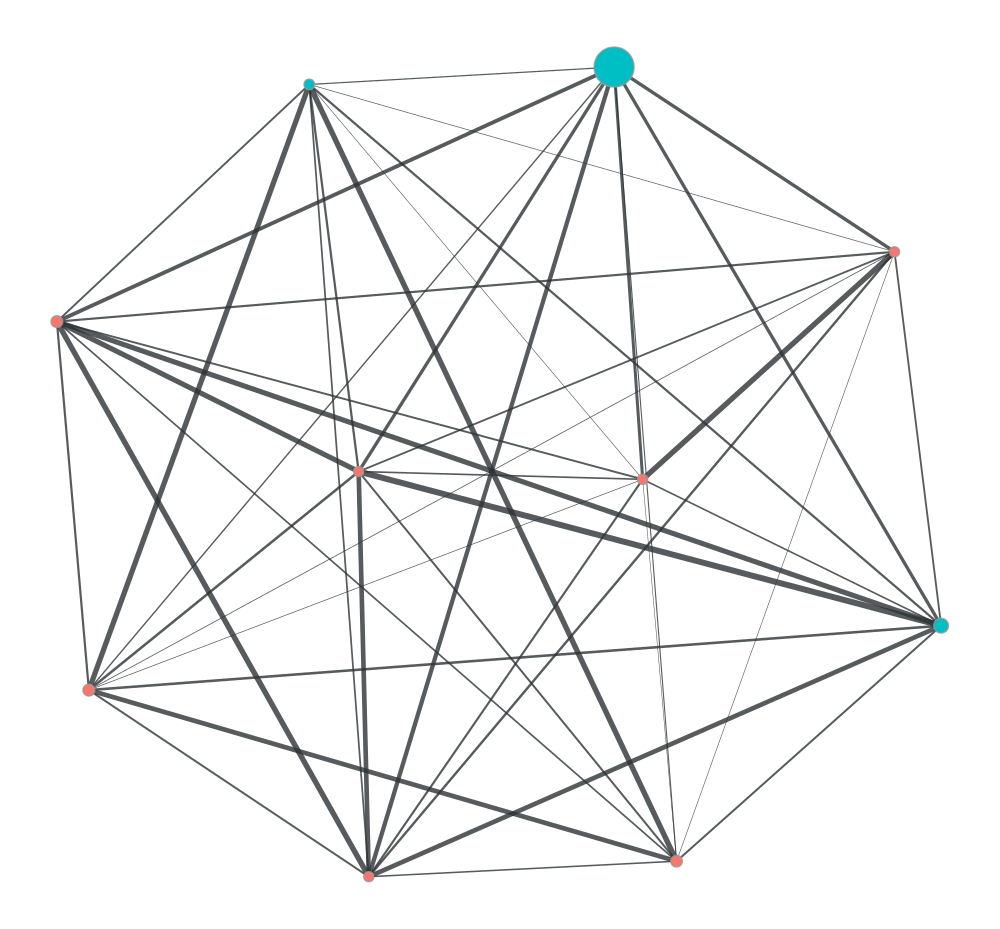

In [214]:
plot_cc_graph(cc_tt, cc_num)

---

# 4.426080e+18

In [222]:
cc442 = fraudTrain[fraudTrain['cc_num'] == 4.426080e+18]

In [224]:
cc442[cc442['trans_date_trans_time'] <= '2019-05-23']

trans_date_trans_time        cc_num  \
4295     2019-01-03 16:27:00  4.426080e+18   
4645     2019-01-03 22:09:00  4.426080e+18   
5331     2019-01-04 12:04:00  4.426080e+18   
9329     2019-01-06 20:37:00  4.426080e+18   
10854    2019-01-07 13:47:00  4.426080e+18   
...                      ...           ...   
286046   2019-05-20 17:23:00  4.426080e+18   
288209   2019-05-21 18:11:00  4.426080e+18   
288641   2019-05-22 00:17:00  4.426080e+18   
288669   2019-05-22 00:55:00  4.426080e+18   
290168   2019-05-22 22:46:00  4.426080e+18   

                                     merchant        category     amt first  \
4295                      fraud_Wilkinson PLC       kids_pets   31.41  Kyle   
4645    fraud_Conroy, Balistreri and Gorczany  health_fitness   83.95  Kyle   
5331       fraud_Turner, Ruecker and Parisian        misc_pos   50.57  Kyle   
9329                    fraud_Eichmann-Russel        misc_pos  403.31  Kyle   
10854                      fraud_Ernser-Lynch     food_dining    7.20  Kyle   
...                                       ...             ...     ...   ...   
286046            fraud_Welch, Rath and Koepp   entertainment  221.22  Kyle   
288209                 fraud_O'Hara-Wilderman     food_dining    7.79  Kyle   
288641                    fraud_Kutch-Hegmann     grocery_net    9.71  Kyle   
288669              fraud_Schamberger-O'Keefe     grocery_pos  326.13  Kyle   
290168                  fraud_Turner and Sons    shopping_pos  925.49  Kyle   

         last gender                     street    city  ...      lat  \
4295    James      M  621 Smith Hollow Apt. 738  Topeka  ...  39.0645   
4645    James      M  621 Smith Hollow Apt. 738  Topeka  ...  39.0645   
5331    James      M  621 Smith Hollow Apt. 738  Topeka  ...  39.0645   
9329    James      M  621 Smith Hollow Apt. 738  Topeka  ...  39.0645   
10854   James      M  621 Smith Hollow Apt. 738  Topeka  ...  39.0645   
...       ...    ...                        ...     ...  ...      ...   
286046  James      M  621 Smith Hollow Apt. 738  Topeka  ...  39.0645   
288209  James      M  621 Smith Hollow Apt. 738  Topeka  ...  39.0645   
288641  James      M  621 Smith Hollow Apt. 738  Topeka  ...  39.0645   
288669  James      M  621 Smith Hollow Apt. 738  Topeka  ...  39.0645   
290168  James      M  621 Smith Hollow Apt. 738  Topeka  ...  39.0645   

           long  city_pop                      job         dob  \
4295   -95.6413    163415  Clinical cytogeneticist  1975-06-25   
4645   -95.6413    163415  Clinical cytogeneticist  1975-06-25   
5331   -95.6413    163415  Clinical cytogeneticist  1975-06-25   
9329   -95.6413    163415  Clinical cytogeneticist  1975-06-25   
10854  -95.6413    163415  Clinical cytogeneticist  1975-06-25   
...         ...       ...                      ...         ...   
286046 -95.6413    163415  Clinical cytogeneticist  1975-06-25   
288209 -95.6413    163415  Clinical cytogeneticist  1975-06-25   
288641 -95.6413    163415  Clinical cytogeneticist  1975-06-25   
288669 -95.6413    163415  Clinical cytogeneticist  1975-06-25   
290168 -95.6413    163415  Clinical cytogeneticist  1975-06-25   

                               trans_num   unix_time  merch_lat  merch_long  \
4295    5a9f819ef67c14f2fba4450b2c4c0a52  1325608068  39.081108  -96.382668   
4645    29f1f37c0308b4acb7124476f96b46e9  1325628548  39.172996  -95.262193   
5331    8dd8068e1a201c39be1345f55b181c68  1325678691  39.181594  -95.318685   
9329    163d4b67e2e1218937fe432764f3d762  1325882256  38.123218  -96.221411   
10854   1a38a6390ef0a20ff62a6a03feae8122  1325944026  38.458334  -96.230377   
...                                  ...         ...        ...         ...   
286046  d80ebcb36ac4e5c71e30674e26f91c3d  1337534597  38.577085  -95.633285   
288209  dfc8aef002d6c8f05eef94d13aef4682  1337623869  38.167190  -95.507504   
288641  813537da7e74efa9dcdc81410f570f59  1337645866  38.796660  -95.318658   
288669  14fd4d036eca575980d7302eee0774bb  133

In [215]:
cc_num = 4.426080e+18
s = fraudTrain[fraudTrain['cc_num'] == cc_num]

In [216]:
s.is_fraud.mean(), s.is_fraud.sum(), len(s)

(0.027227722772277228, 11, 404)

In [217]:
s[s.is_fraud == 1][['trans_date_trans_time','amt']]

trans_date_trans_time      amt
288641   2019-05-22 00:17:00     9.71
288669   2019-05-22 00:55:00   326.13
290168   2019-05-22 22:46:00   925.49
290346   2019-05-23 01:16:00   319.58
290384   2019-05-23 02:01:00   280.47
290413   2019-05-23 02:26:00   754.98
290417   2019-05-23 02:33:00   310.24
290466   2019-05-23 03:35:00    11.98
291943   2019-05-23 22:05:00   544.90
291976   2019-05-23 22:22:00  1009.31
292059   2019-05-23 23:07:00   909.00

In [218]:
cc_tt = s[('2019-05-18' <= s['trans_date_trans_time']) & (s['trans_date_trans_time'] <= '2019-05-22 00:55:00')]
len(cc_tt), cc_tt.is_fraud.mean()

(8, 0.25)

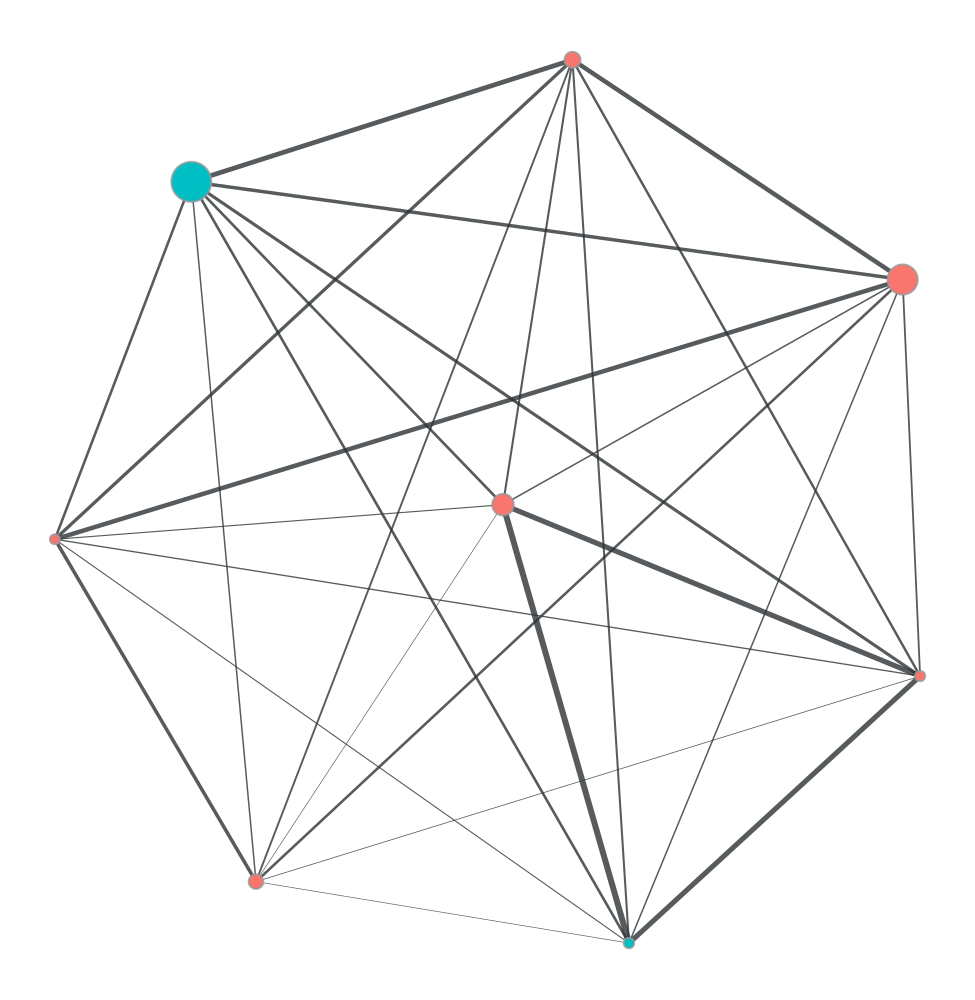

In [219]:
plot_cc_graph(cc_tt, cc_num)

---

# 4.798940e+18	

In [225]:
cc_num = 4.798940e+18
s = fraudTrain[fraudTrain['cc_num'] == cc_num]

In [226]:
s.is_fraud.mean(), s.is_fraud.sum(), len(s)

(0.017369727047146403, 7, 403)

In [227]:
s[s.is_fraud == 1][['trans_date_trans_time','amt']]

trans_date_trans_time     amt
426840   2019-07-10 17:25:00  864.02
427426   2019-07-10 22:56:00  872.04
427719   2019-07-11 02:03:00  320.18
427766   2019-07-11 02:38:00  316.36
428454   2019-07-11 11:43:00  598.28
429701   2019-07-11 22:34:00  895.19
429765   2019-07-11 23:05:00  929.39

In [228]:
cc_tt = s[('2019-07-08' <= s['trans_date_trans_time']) & (s['trans_date_trans_time'] <= '2019-07-15')]
len(cc_tt), cc_tt.is_fraud.mean()

(17, 0.4117647058823529)

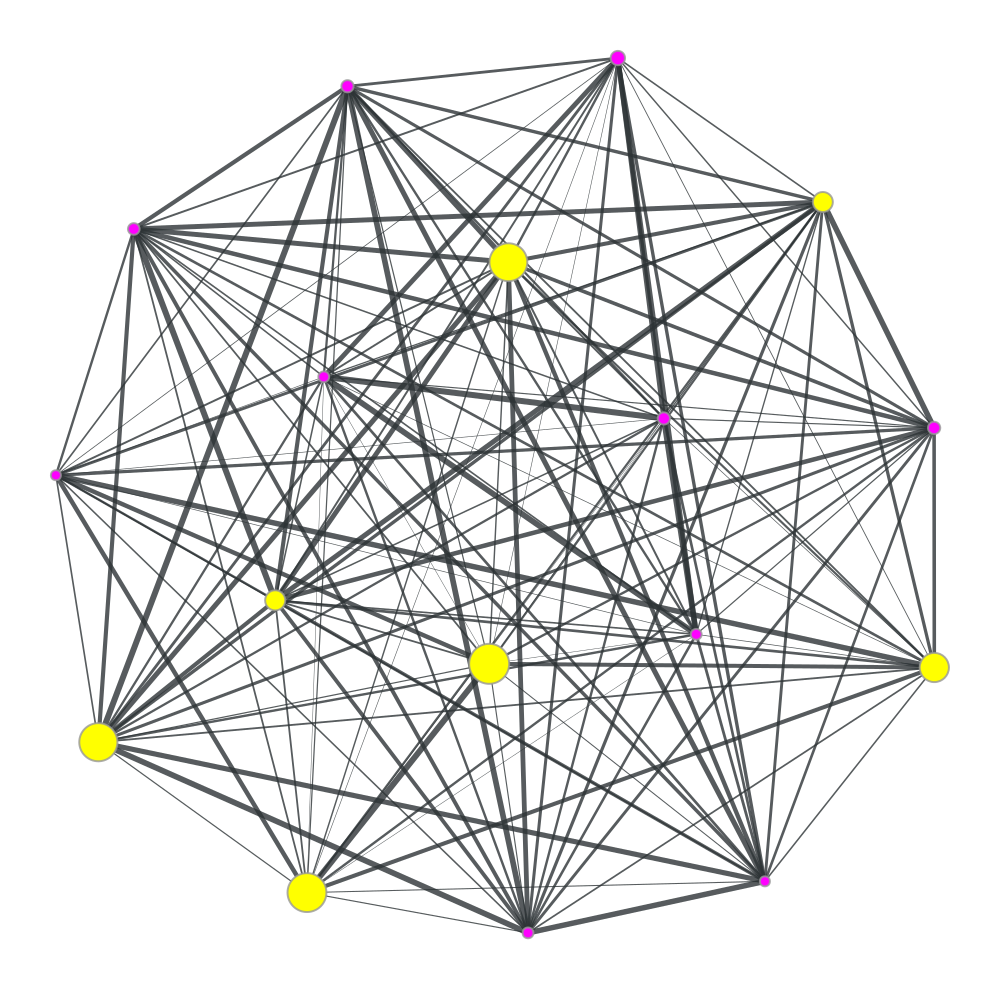

In [229]:
plot_cc_graph(cc_tt, cc_num)

---